In [144]:
import pandas as pd
import numpy as np
import random 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Nonparametric Test

**모수적 검정**
* 관측 값이 어느 특정한 확률분포를 따른다는 가정 하에 분포의 모수(parameter)에 대한 검정
* 표본 크기가 충분($n\ge30$)하여 중심극한정리에 의해 정규성 가정을 만족할 때 사용 가능

**비모수적 검정**
* 관측 값이 어느 특정한 확률분포를 따른다고 전제할 수 없거나 또는 모집단에 대한 아무런 정보가 없는 경우에 실시하는 검정
* 표본 크기가 충분하지 않아($n\le30$) 정규성 가정을 만족하지 않을 때 사용

<div>
<img src="images/non1.png" width="500"/>
</div>

**비모수 검정의 장단점**
* 분포 가정 불필요하므로 어떠한 형태의 모집단에 대한 비교 가능
* 실제 관측값이 아닌 상대적 평가(rank)에 의존하므로 이상치의 영향 無

## Tests for Ordinal Data

### Kolmogorov-Smirnov Test
: 두 집단의 누적확률분포 간의 거리를 통해 두 집단이 서로 얼마나 차이나는지 검정하는 방법론

(1) The empirical distribution function $F_n(x)$ for $n$ i.i.d. ordered observations $X_i$ :

$$ F_n(x) = \frac{1}{n}\sum_{i=1}^n 1_{(-\infty,x]}(X_i) $$

(2) The Kolmogorov-Smirnov statistic:

$$ D_{n,m} = sup_x |F_{1,n}(x)-F_{2,m}(x)|, $$

$\quad$ where $F_{1,n}(x)$ and $F{2,m}(x)$ are the eCDF of 1st and 2nd sample respectively.

<div>
<img src="images/non2.png" width="250"/>
</div>
<center> [red: eCDF of the 1st sample, blue: eCDF of the 2nd sample, black arrow: k-s statistic] 

In [164]:
# create random samples

# norm_a = [random.choice(list(range(100))) for i in range(100)]
# norm_b = [random.choice(list(range(100))) for i in range(100)]
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 1, scale = 1.5, size = 500)

ab_norm = pd.concat([pd.DataFrame(norm_a), pd.DataFrame(norm_b)], axis=0).reset_index(drop=True)
category = pd.DataFrame(pd.Series(['a_norm', 'b_norm']).repeat(500)).reset_index(drop=True)
dt = pd.concat([category, ab_norm], axis=1)
dt.columns = ['category', 'value']

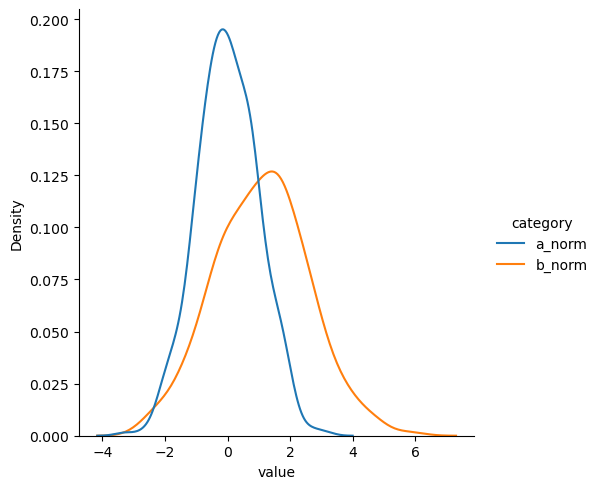

In [165]:
# probability mass function
sns.displot(dt, x='value', hue='category', kind='kde')

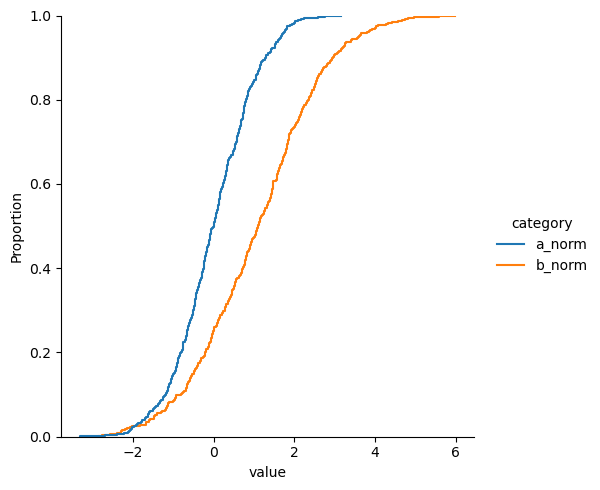

In [166]:
# empirical cdf
sns.displot(dt, x='value', hue='category', kind='ecdf')

In [167]:
# kolmogorov smirnov test for two sample

grp1 = dt.loc[dt['category']=='a_norm','value']
grp2 = dt.loc[dt['category']=='b_norm','value']

kstest = stats.ks_2samp(grp1, grp2, alternative='two-sided')
print('the statistic of k-s test for two sample: ', round(kstest.statistic,3))
print('the p-value of k-s test for two sample: ', round(kstest.pvalue,3))

the statistic of k-s test for two sample:  0.382
the p-value of k-s test for two sample:  0.0


### Wilcoxon Signed-Rank Test
: 두 그룹의 중심치가 차이 나는지 검정하는 방법론으로 ***대응표본 t-test의 비모수 버전***

The test is performed as follows:

1. Compute $|X_1|,...,|X_n|$.
    * For one sample, $X_i$ would be the **distance from measures of central tendency (mean, median, mode)**
    * For paired data $X_i$ would be the **difference between paired data**

2. Assign ranks $|R_1|,...|R_n|$ to sorted list of $|X_1|,...|X_n|$ by ascending order.

3. Let **sgn** denote the sign function: $sgn(x) = 1$ if $x>0$ and $sgn(x) = 1$ if $x>0$

4. The test statistic is the signed-rank sum $T$:
$$ T = \sum_{i=1}^N sgn(X_i)R_i $$

In [220]:
print(dt.head(2), dt.tail(2), sep='\n\n')

  category     value
0   a_norm  0.675241
1   a_norm -0.093151

    category     value
998   b_norm  2.557038
999   b_norm  1.518079


In [222]:
grp1 = dt.loc[dt['category']=='a_norm','value']
grp2 = dt.loc[dt['category']=='b_norm','value']

wilcoxon = stats.wilcoxon(grp1, grp2, alternative='two-sided')

print('the statistic of wilcoxon signed rank test for paired sample:', round(kstest.statistic,3))
print('the p-value of wilcoxon signed rank test for paired sample:', round(kstest.pvalue,3))

the statistic of wilcoxon signed rank test for paired sample: 1.0
the p-value of wilcoxon signed rank test for paired sample: 0.0


### Mann-Whitney U Test (Wilcoxon Rank Sum Test)
: 두 그룹의 중심치가 차이 나는지 검정하는 방법론으로 ***독립표본 t-test의 비모수 버전***

(대응표본이 아닌 '독립표본'에 대해 검정한다는 점에서 wilcoxon signed rank test와 다름)

**Mann Whitney U Test와 Wilcoxon Rank Sum Test의 관계**

* Wilcoxon Rank Sum Test은 1945년, Mann Whiteny U test는 1947년에 각각 독립적으로 발표된 연구이나 사실상 두 방법론은 같고, 현재는 Mann Whitney U test라는 이름으로 더 많이 쓰임

**Wilcoxon Rank Sum Test**

1. Assign numeric ranks to all the observations $X_1,\cdots,X_m, Y_1,\cdots,Y_n$ (put the observations from both groups to one set).

2. The test statistic of signed-rank sum, $W$ is then given by:
$$ W = \sum_{j=1}^nR_j, $$
$\quad$ where $R_j$ is the rank of $Y_j$.

**Mann Whitney U Test**

The test is performed as follows:

1. Assign numeric ranks to all the observations $X_1,\cdots,X_m, Y_1,\cdots,Y_n$ (put the observations from both groups to one set).

2. The statistic, $U$, indicating the number of every pair observations $(X_i,Y_j)$ satisfying \{$Y_j \ge X_i$ \}:
$$ U = \sum_{i=1}^m\sum_{j=1}^n \psi(Y_j-X_i) $$
$\quad$ where $\psi(x)=sgn(x)$ 

3. The relatioship between W and U:
$$ W = U + \frac{n(n+1)}{2} $$
$ \because \quad W = \sum_{k=1}^{n}rank(Y_{(k)})$

$ \ \quad\quad\quad\quad  = \sum_{i=1}^m\sum_{j=1}^n \psi(Y_j-X_i) + \sum_{k=1}^nk $

$ \ \quad\quad\quad\quad = U + \frac{n(n+1)}{2} $

4. Oppositely, the statistic, $U^{\prime}$, indicating the number of every pair observations $(X_i,Y_j)$ satisfying \{$X_i \ge Y_j$ \}:

$$ U^{\prime} = \sum_{i=1}^m\sum_{j=1}^n \{ 1 - \psi(Y_j-X_i) \} $$

5. Thus,

$$ U + U^{\prime} = mn, $$

$$ U^{\prime} = mn + \frac{n(n+1)}{2} - \sum_{j=1}^{n}R_{j} $$

In [251]:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

<Axes: ylabel='Proportion'>

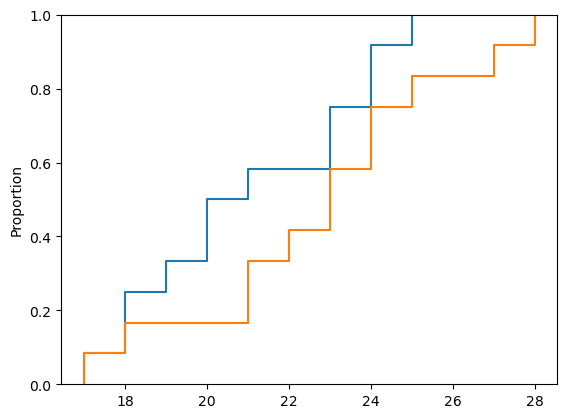

In [254]:
sns.ecdfplot(group1) # ecdf
sns.ecdfplot(group2) # ecdf

In [258]:
utest = stats.mannwhitneyu(group1, group2, use_continuity=True, alternative='two-sided')

print('the statistic of mann-whitney for paired sample:', round(utest.statistic,3))
print('the p-value of mann-whitney for paired sample:', round(utest.pvalue,3))

the statistic of mann-whitney for paired sample: 50.0
the p-value of mann-whitney for paired sample: 0.211


### Kruskal-Wallis Test
: 두 집단 간 비교를 하는 one-way ANOVA에서 정규성 가정이 만족되지 않을 때 사용하는 비모수 검정법.

* 실제 표본을 이용하여 사용하는 ANOVA와 달리, 표본들의 rank를 이용하여 median이 같은지를 검정함

The test statistic:

$$ H = (N-1)\frac{\sum_{i=1}^g n_i(\bar r_{i.} - \bar r)^2}{\sum_{i=1}^g \sum_{j=1}^{n_i}(r_{ij} - \bar r)^2}, $$    

where $N$: 전체 관측값 개수

$\quad\quad g$:그룹 개수 

$\quad\quad n_i$:그룹 $i$의 관측값 개수

$\quad\quad r_{ij}$: 그룹 $i$의 관측값 $j$

$\quad\quad \bar r_{i.}=\frac{\sum_{j=1}^{n_i}r_{ij}}{n_i}$: 그룹 $i$의 관측값 $j$

$\quad\quad \bar r = \frac{N+1}{2}$: 모든 $r_{ij}$의 평균

(참고) ANOVA의 검정 통계량

$$ F = \frac{SSB/df_B}{SSW/df_W}, $$

where $ SSB $: between-groups sum of squares,

$\quad\quad SSW$: within-groups sum of squares.

In [331]:
group1 = [21, 23, 6, 25, 18, 5, 15, 4, 11, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
group3 = [24, 25, 21, 22, 23, 19, 17, 28, 24, 27, 22, 23]

<Axes: ylabel='Proportion'>

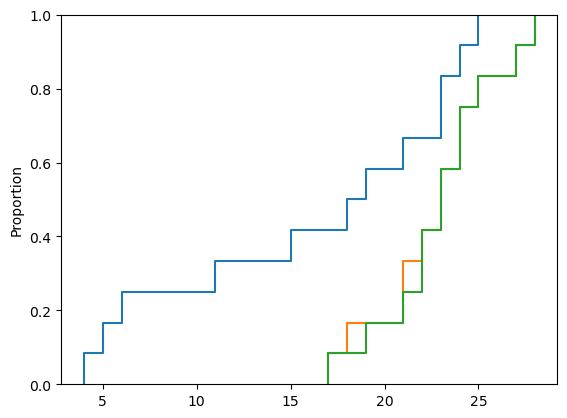

In [332]:
sns.ecdfplot(group1) # ecdf
sns.ecdfplot(group2) # ecdf
sns.ecdfplot(group3) # ecdf

In [333]:
kwtest = stats.kruskal(group1, group2, group3)

print('the statistic of kruskal-wallis:', round(kwtest.statistic,3))
print('the p-value of kruskal-wallis:', round(kwtest.pvalue,3))

the statistic of kruskal-wallis: 6.157
the p-value of kruskal-wallis: 0.046


## Tests for nominal data

### Chi-Square Test
: 두 그룹이 동질한지, 즉 확률분포가 같은지 검정하는 방법론

(단, 모든 관측값들이 기대도수 5 이상으로 정규근사 조건을 만족할 때 사용 가능함)

|      |   Comp   |   Ref     | Sum |  
| :-: | :-: | :-: | :-: 
| **Fail** | $$O_{11}$$ | $$O_{12}$$  | $$n$$   |
| **Pass** | $$O_{21}$$ | $$O_{22}$$  | $$N-n$$ |
| **Sum**  | $$m$$ | $$N-m$$ | $$N$$ |

The Chi-Square test statistic:
$$ \chi^2 = \sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}} \sim \chi^2_{(r-1)(c-1)} $$

[수식 유도 참고] https://t1.daumcdn.net/cfile/tistory/2648794053155BEF16

<div>
<img src="images/non3.png" width="450"/>
</div>

<div>
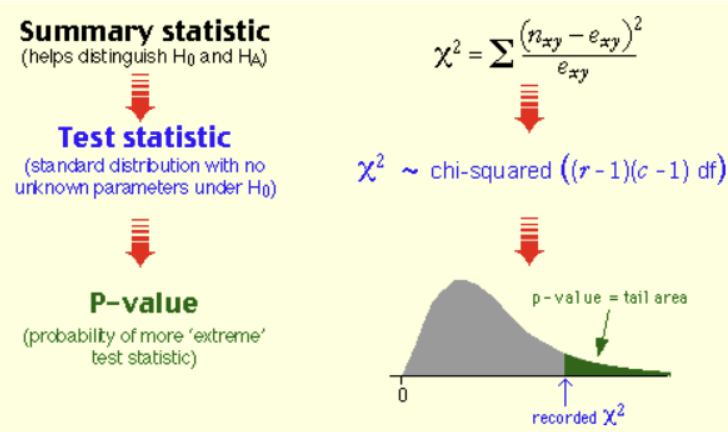
</div>

In [277]:
# make a contingency table
obs = pd.DataFrame({'당뇨':[10,15], '정상':[10,65]})
obs.index = ['비만체중', '정상체중']
obs

,당뇨,정상
비만체중,10,10
정상체중,15,65


In [279]:
# Without continuity correction
chitest = stats.chi2_contingency(obs, correction=False)

print('Chi-square:', round(chitest.statistic,3))
print('p-value:', round(chitest.pvalue,3))

Chi-square: 8.333
p-value: 0.004


In [281]:
# Without continuity correction
chitest = stats.chi2_contingency(obs, correction=True)

print('Chi-square:', round(chitest.statistic,3))
print('p-value:', round(chitest.pvalue,3))

Chi-square: 6.75
p-value: 0.009


연속성 수정을 하면, 0.5씩 기대값이 상승하여 통계량은 그만큼 작아지고 p-value는 커짐

### Fisher's Exact Test
: 두 그룹이 동질한지, 즉 확률분포가 같은지 검정하는 방법론.

* 단, 기대도수가 5이하로 카이제곱검정의 정규근사를 만족하지 않을 때 초기하분포를 이용하여 정확한 p-value를 계산한다.

**초기하분포**

: $N$개의 모집단에서 $n$개의 샘플을 비복원추출 하였을 때, 특정 그룹에서 $k$개가 추출될 확률의 분포

$$ X \sim Hypergeometric(N,K,n) $$

$$ pr(X=k) = \frac{{K \choose k}{N-K \choose n-k}}{N \choose n} $$

**[예시]** 대립가설 : 성별과 RH 혈액형 사이에 연관성이 있다 (양측검정)

|      |   Female   |   Male     | Sum |  
| :-: | :-: | :-: | :-: 
| **RH-** | 1 | 5  | **6**  |
| **RH+** | 481 | 513  | **994** |
| **Sum**  | **482** | **518** | **1000** |

<div>
<img src="images/non4.png" width="600"/>
</div>

Yes에 해당하는 Case들의 확률을 모두 더하면 **0.219 (= p-value)**

### example 1

In [334]:
# make a contingencty table
obs = np.array([1,5,481,513]).reshape(2,2)
print(obs)

[[  1   5]
 [481 513]]


In [335]:
# fisher's exact test
fisher = stats.fisher_exact(obs, alternative='two-sided')

print('p-value:', round(fisher.pvalue,3))

p-value: 0.219


#### 만약 위 케이스에 카이제곱검정을 한다면?

In [322]:
obs = pd.DataFrame({'female':[1,481], 'male':[5,513]})
obs.index = ['rh-', 'rh+']
obs

# Without continuity correction
chi_wo = stats.chi2_contingency(obs, correction=False)
print('Chi-square w/o correction:', round(chi_wo.statistic,3))
print('p-value w/o correction:', round(chi_wo.pvalue,3))
print('\n')

Chi-square w/o correction: 2.404
p-value w/o correction: 0.121




### Example 2

In [338]:
# make a contingencty table
obs = np.array([1,8,481,513]).reshape(2,2)
print(obs)

[[  1   8]
 [481 513]]


In [339]:
# fisher's exact test
fisher = stats.fisher_exact(obs, alternative='two-sided')

print('p-value:', round(fisher.pvalue,3))

p-value: 0.039


In [340]:
obs = pd.DataFrame({'female':[1,481], 'male':[8,513]})
obs.index = ['rh-', 'rh+']
obs

# With continuity correction
chi_w = stats.chi2_contingency(obs, correction=True)
print('Chi-square w/ correction:', round(chi_w.statistic,3))
print('p-value w/ correction:', round(chi_w.pvalue,3))

Chi-square w/ correction: 3.585
p-value w/ correction: 0.058
